## Decision Tree

A Decision Tree is a popular machine learning algorithm for both classification and regression tasks. It's a tree-like model where each internal node represents a feature (or attribute), each branch represents a decision rule, and each leaf node represents an outcome or prediction. A Decision Tree model can be used to visually and explicitly represent decisions and decision making. A decision tree is a set of hierarchical decisions which eventually give us a final result. The result can be a regression prediction or a classification.

In [2]:
import pandas as pd

In [3]:
salaries = pd.read_csv('salaries.csv')
salaries.head() 

,company,job,degree,salary_more_then_100k
0,google,sales executive,bachelors,0
1,google,sales executive,masters,0
2,google,business manager,bachelors,1
3,google,business manager,masters,1
4,google,computer programmer,bachelors,0


In [4]:
x = salaries.iloc[:, 0:3]
y = salaries.iloc[:, 3]

In [5]:
x

,company,job,degree
0,google,sales executive,bachelors
1,google,sales executive,masters
2,google,business manager,bachelors
3,google,business manager,masters
4,google,computer programmer,bachelors
5,google,computer programmer,masters
6,abc pharma,sales executive,masters
7,abc pharma,computer programmer,bachelors
8,abc pharma,business manager,bachelors
9,abc pharma,business manager,masters


In [6]:
y

0     0
1     0
2     1
3     1
4     0
5     1
6     0
7     0
8     0
9     1
10    1
11    1
12    1
13    1
14    1
15    1
Name: salary_more_then_100k, dtype: int64

### Converting the categorical columns into numerical columns with the LabelEncoder

In [7]:
from sklearn.preprocessing import LabelEncoder

lb = LabelEncoder()
x['company'] = lb.fit_transform(x['company'])
x['job'] = lb.fit_transform(x['job'])
x['degree'] = lb.fit_transform(x['degree'])

In [8]:
x

,company,job,degree
0,2,2,0
1,2,2,1
2,2,0,0
3,2,0,1
4,2,1,0
5,2,1,1
6,0,2,1
7,0,1,0
8,0,0,0
9,0,0,1


In [9]:
y

0     0
1     0
2     1
3     1
4     0
5     1
6     0
7     0
8     0
9     1
10    1
11    1
12    1
13    1
14    1
15    1
Name: salary_more_then_100k, dtype: int64

In [11]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [12]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()

In [13]:
model.fit(x_train, y_train)

DecisionTreeClassifier()

In [14]:
y_pred = model.predict(x_test)

In [15]:
model.score(x_test, y_test)

0.75

In [16]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
cm

array([[2, 0],
       [1, 1]], dtype=int64)

<Axes: >

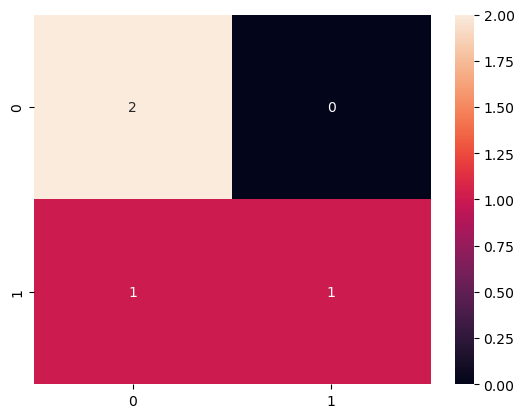

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.xlabel('Predicted')
plt.ylabel('Actual')
sns.heatmap(cm, annot = True)

In [18]:
from sklearn.metrics import classification_report

cr = classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.67      1.00      0.80         2
           1       1.00      0.50      0.67         2

    accuracy                           0.75         4
   macro avg       0.83      0.75      0.73         4
weighted avg       0.83      0.75      0.73         4

